In [15]:
import requests
from matplotlib import pyplot as plt

HOST = 'http://localhost:8080'


In [23]:
# Ex 2.2.A
response = requests.get(HOST + '/devices')
if response.status_code == 200:
    # print(response.json())
    response_a = response.json()
    devices = response_a.get('mac_addresses', [])
    print(devices)
else:
    print('The server is offline.')

['0x3e22fb773c9b', '0xacde48001128', '0xacde48001122', '0xe62f44295ead', '0xb68579452d1f']


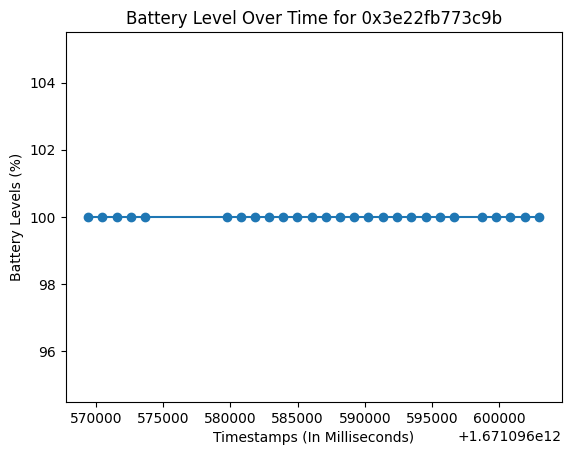

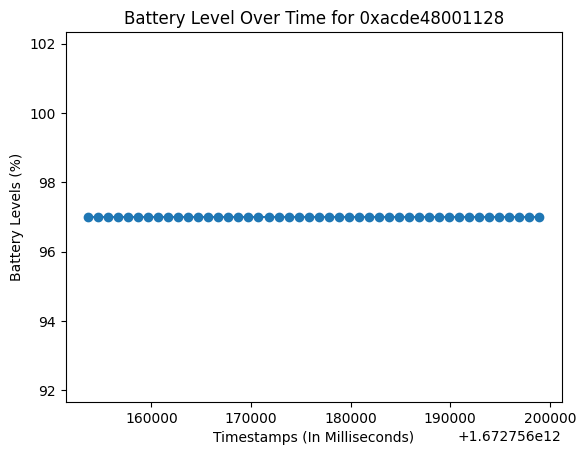

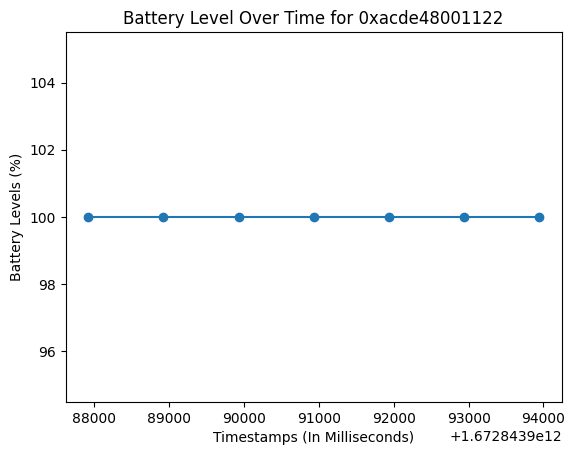

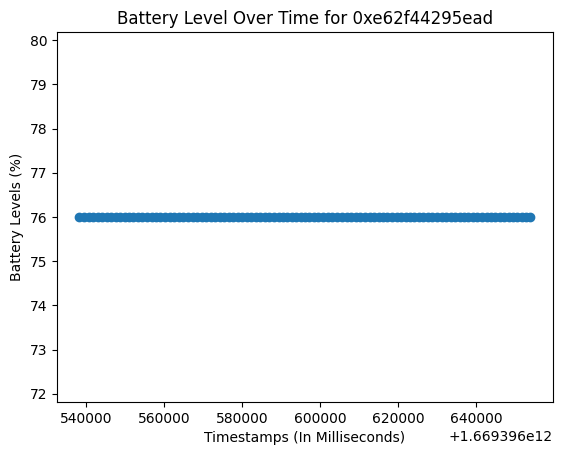

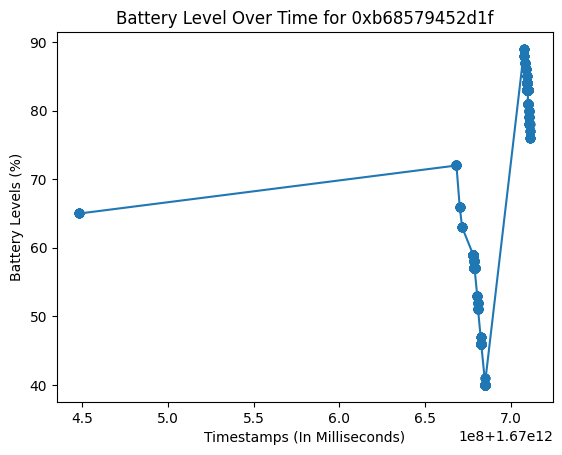

In [24]:
# Ex 2.2.B
payload = {
    'from' : 0,
    'to' : 1672844001977
}
for device in devices:
    response_b = requests.get(HOST + '/device/' + device , params=payload)
    response_json = response_b.json()
    mac_address = device
    timestamps = response_json.get('timestamps', [])
    battery_levels = response_json.get('battery_levels', [])
    if len(timestamps) > 0:
        plt.plot(timestamps, battery_levels, '-o')
        plt.title('Battery Level Over Time for ' + mac_address)
        plt.xlabel('Timestamps (In Milliseconds)')
        plt.ylabel('Battery Levels (%)')
        plt.show()

In [22]:
# 2.2.C
response_c = requests.delete(HOST+'/device/'+devices[-1])
if response_c.status_code == 200:
    print(f'Successfully deleted last device data {devices[-1]}')

Successfully deleted last device data 0xb68579452d20
